In [65]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [66]:
df = pd.read_csv('data/prueba_fetchdata_metrobus.csv',encoding='latin-1')
df.position_latitude = df.position_latitude.astype(float)
df.position_longitude = df.position_longitude.astype(float)

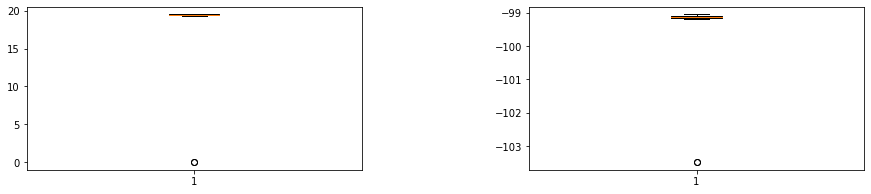

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize= (15,3))
ax1.boxplot(df.position_latitude)
ax2.boxplot(df.position_longitude)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [68]:
print(df.shape)
df = df[df.position_latitude >= df.position_latitude.quantile(0.005)]
print(df.shape)
df.reset_index(inplace=True)

(207, 14)
(205, 14)


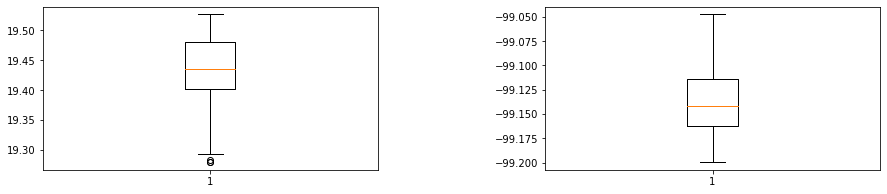

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize= (15,3))
ax1.boxplot(df.position_latitude)
ax2.boxplot(df.position_longitude)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [70]:
rutas = pd.read_csv('data/Rutas.csv')
rutas.columns = ['Alcaldia','Longitud','Latitud']
rutas['Alcaldia'] = rutas.Alcaldia.str.split(' / ',expand=True)[0]

## Alcaldias
<img src="Img.JPG">

In [71]:
alcaldia = []
for i in range(df.shape[0]):
    l = []
    for j in range(rutas.shape[0]):
        long = df.position_longitude.astype(float)[i]
        lat = df.position_latitude.astype(float)[i]
        a = (long,lat)
        long_al = rutas.Longitud[j]   
        lat_al =  rutas.Latitud[j] 
        b = (long_al,lat_al)
        l.append(distance.euclidean(a, b))
    alcaldia.append(rutas.Alcaldia[l.index(min(l))])

df['Nombre'] = alcaldia

In [72]:
alcaldias = pd.read_csv('data/alcaldias.csv',encoding='utf-8')
alcaldias = alcaldias[['nomgeo','municipio']]
alcaldias.columns = ['Nombre','idalcaldia']

In [73]:
df = pd.merge(df,alcaldias,how='left',on = 'Nombre')
df = df[['vehicle_id','position_latitude','position_longitude','vehicle_current_status','idalcaldia']]
df.columns = ['vehicleid','positionlatitude','positionlongitude','vehiclecurrentstatus','idalcaldia']

In [74]:
conx = sqlite3.connect('data.db')
conx.execute('drop table if exists Unidades;')
conx.commit()
df.to_sql('Unidades',conx,index=False)

In [75]:
conx.execute('drop table if exists Alcaldias;')
conx.commit()
alcaldias.to_sql('Alcaldias',conx,index=False)

In [76]:
# alcaldias = pd.read_csv('data/alcaldias (2).csv',encoding='utf-8')
# l_poligonos = []
# for i in range(alcaldias.shape[0]):
#     xy = np.array(json.loads(alcaldias.geo_shape[9])['coordinates'][0])
#     l = []
#     for e in xy:    
#         l.append(tuple(e))
#     l_poligonos.append(l)
# alcaldias['Poligonos'] = l_poligonos
# alcaldias['latitud'] = alcaldias.geo_point_2d.str.split(',',expand=True)[0].astype(float)
# alcaldias['longitud'] = alcaldias.geo_point_2d.str.split(',',expand=True)[1].astype(float)


In [77]:
# def is_point_in_path(x: int, y: int, poly) -> bool:
#     # Determine if the point is in the polygon.
#     #
#     # Args:
#     #   x -- The x coordinates of point.
#     #   y -- The y coordinates of point.
#     #   poly -- a list of tuples [(x, y), (x, y), ...]
#     #
#     # Returns:
#     #   True if the point is in the path or is a corner or on the boundary
     
#         num = len(poly)
#         j = num - 1
#         c = False
#         for i in range(num):
#             if (x == poly[i][0]) and (y == poly[i][1]):
#                 # point is a corner
#                 return True
#             if ((poly[i][1] > y) != (poly[j][1] > y)):
#                 slope = (x-poly[i][0])*(poly[j][1]-poly[i][1])-(poly[j][0]-poly[i][0])*(y-poly[i][1])
#                 if slope == 0:
#                     # point is on boundary
#                     return True
#                 if (slope < 0) != (poly[j][1] < poly[i][1]):
#                     c = not c
#             j = i
#         return c

In [78]:
# l_poligonos = []
# for i in range(alcaldias.shape[0]):
#     x = alcaldias.geo_point_2d.str.split(',',expand=True)[1].astype(float)[i]
#     y = alcaldias.geo_point_2d.str.split(',',expand=True)[0].astype(float)[i]
#     xy = np.array(json.loads(alcaldias.geo_shape[9])['coordinates'][0])
#     l = []
#     for e in xy:    
#         l.append(tuple(e))
#     l_poligonos.append(l)
#     print(is_point_in_path(x,y,l),x,y,alcaldias.nomgeo[i])